# [문제1]데이터 전처리

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [3]:
# 데이터 준비
breast = load_breast_cancer()
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['class'] = breast.target
#class를 타깃으로 잡는다

#유방암 데이터에서 악성종양은 'class = 1' / 양성종양은 'class = 0'을 의미한다.

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
# 특성과 타겟 데이터 설정
X = df.drop(columns=['class'])  # 'class' 열 제외한 모든 열을 특성 데이터로 설정
y = df['class']  # 'class' 열을 타겟 데이터로 설정

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

In [5]:

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)  # X_train을 기반으로 스케일링
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [6]:
# k-최근접 이웃 분류기 생성 및 훈련
kn = KNeighborsClassifier(n_neighbors = 5)  # 예시로 이웃의 개수를 5로 지정
kn.fit(X_train_scaled, y_train)

# 훈련 세트와 테스트 세트의 점수 확인
print(kn.score(X_train_scaled, y_train))
print(kn.score(X_test_scaled, y_test))

0.98046875
0.9824561403508771


In [7]:
print(kn.classes_) #학습한 클래스 label의 순서를 확인

[0 1]


In [8]:
print(kn.predict(X_test_scaled[:5]))

[0 1 1 0 1]


In [9]:

#각 클래스 별 확률 확인하기
proba = kn.predict_proba(X_test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.8 0.2]
 [0.  1. ]
 [0.  1. ]
 [0.8 0.2]
 [0.  1. ]]


In [36]:
distances, indexes = kn.kneighbors(X_test_scaled[3:4])
for i in indexes:
  print(y_train[i])

48     1
314    1
283    0
209    1
226    1
Name: class, dtype: int64


## [문제 2]로지스틱 회귀

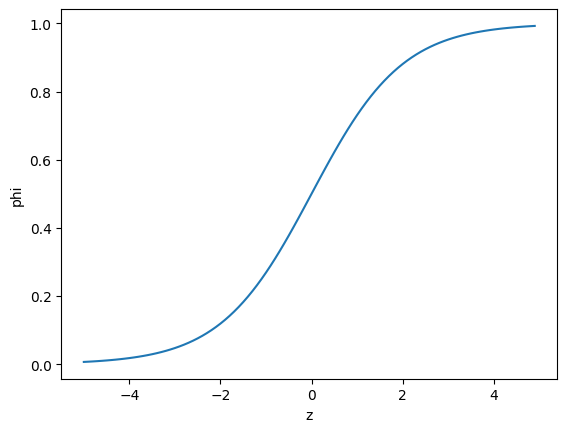

In [11]:


#시그모이드 함수
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 지수 함수는 np.exp()메서드 사용

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### [문제 3]로지스틱 회귀로 이진 분류 수행하기

In [12]:
#이진 분류 수행하기
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
#A와 C 골라내기
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [13]:
#0과 1 행 골라내기
cancer_indexes = (y_train == 0) | (y_train == 1) # 비교연산자 사용하기
#0은 악성종양(malignant) / 1은 양성종양(benign)이다.
train_cancer = X_train[cancer_indexes]
target_cancer = y_train[cancer_indexes]

In [14]:

#모델 훈련
lr = LogisticRegression(max_iter=1000)
#max_iter 매개변수를 조정하여 모델이 충분히 학습되도록 하여 수렴 문제를 방지한다.
lr.fit(train_cancer, target_cancer)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
# 처음 5개 샘플 예측
print(lr.predict(train_cancer[:5]))

[0 0 1 1 1]


In [16]:
print(lr.predict_proba(train_cancer[:5]))

[[9.99999886e-01 1.14482926e-07]
 [9.83343828e-01 1.66561722e-02]
 [5.56975207e-03 9.94430248e-01]
 [6.24832947e-03 9.93751671e-01]
 [2.02113256e-02 9.79788674e-01]]


In [17]:
print(lr.classes_)

[0 1]


In [18]:
#계수 확인
print(lr.coef_, lr.intercept_)

[[ 1.4562527   0.02923087  0.1196348  -0.00498978 -0.19972434 -0.19980867
  -0.58594892 -0.38005296 -0.31363333 -0.00332402 -0.08625474  0.3121517
  -0.18913398 -0.07530832 -0.02396124  0.12491281  0.03794644 -0.04378958
  -0.03361503  0.02570448  1.14844856 -0.24465378 -0.27464844 -0.01835189
  -0.3439348  -0.31788647 -1.1995815  -0.66429184 -0.70946434 -0.03638014]] [6.78686438]


In [19]:
#z값 출력
decisions = lr.decision_function(train_cancer[:5])
print(decisions)

[-15.98284003  -4.07817798   5.18481942   5.0691732    3.88109379]


In [20]:

#시그모이드 함수 통과로 확률 구하기
print(expit(decisions))

[1.14482926e-07 1.66561722e-02 9.94430248e-01 9.93751671e-01
 9.79788674e-01]


### [문제4]로지스틱 회귀로 다중 분류 수행하기

In [21]:
#다중분류 시행
lr = LogisticRegression(C=20, max_iter = 1000) #1000회 반복 횟수 지정 매개변수
lr.fit(X_train_scaled, y_train)
#테스트, 훈련세트 점수
print(lr.score(X_train_scaled, y_train))
print(lr.score(X_test_scaled, y_test))

0.990234375
0.9824561403508771


In [22]:
#테스트 세트 처음 5개 샘플 예측 하기
print(lr.predict(X_test_scaled[:5]))

[0 1 1 0 1]


In [23]:
#테스트 세트 처음 5개 샘플 예측확률 출력하기
proba = lr.predict_proba(X_test_scaled[:5])
print(np.round(proba, decimals=2))

[[0.62 0.38]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]]


In [24]:
print(lr.classes_)

[0 1]


In [25]:
#coef_, intercept_ 크기 출력
print(lr.coef_, lr.intercept_)

[[ 1.51919679 -0.15010981  1.37503939  0.10549621 -1.00358214  3.07138592
  -2.91163043 -1.93605693  0.45800735  0.10835791 -3.26832075  0.64271988
   0.51544894 -2.61400979 -0.69139534 -0.71415299  1.57142803 -1.84011437
   0.7090387   3.47467372 -3.12073173 -2.28131792 -2.64468602 -3.74500705
   0.25839631  0.87374267 -1.55202851 -0.93758777 -1.45701072 -2.43377105]] [-0.88670528]


In [26]:
#테스트 세트 처음 5개 샘플에 대한 Z1~Z7의 값
decision = lr.decision_function(X_test_scaled[:5])
print(np.round(decision, decimals=3))

[-0.493  7.884 10.037 -4.963 11.56 ]


In [27]:
# 테스트 세트의 처음 5개 샘플에 대한 결정 함수 값(Z1~Z7) 출력
decision = lr.decision_function(X_test_scaled[:5])
print("Decision function values (Z1~Z7):\n", np.round(decision, decimals=3))

# softmax 함수에 decision 배열을 전달하여 확률값 계산

proba = softmax(decision, axis=0)

# 소수점 셋째 자리까지 반올림하여 확률을 출력합니다.
print("Class probabilities:\n", np.round(proba, decimals=3))

Decision function values (Z1~Z7):
 [-0.493  7.884 10.037 -4.963 11.56 ]
Class probabilities:
 [0.    0.02  0.175 0.    0.804]


# 생각해보기

1.로지스틱 회귀에 사용되는 데이터가 비선형 관계를 가지면 로지스틱 회귀 모델을 사용할 수 없는데 그 이유가 무엇인가요?

답 : 로지스틱 회귀 모델은 선형 모델이다. 입력 특성들과 가중치들 간의 선형 조합을 시그모이드 함수에 통과시켜 확률을 예측하는 모델이다.



2.decision_fuction() 메서드의 출력이 0일때 시그모이드 함수의 값은 얼마인가요?

답 : 0.5이다.

3.이진분류에서 시그모이드 함수의 출력을 음성 클래스로 판단하는 경우 2가지를 말해보세요 .

답 : 출력값이 0.5보다 작을 때, 출력값이 decision boundary보다 작을 때

## [문제5] SGDClassifier

In [28]:
from sklearn.linear_model import SGDClassifier

In [29]:
# SGDClassifier 모델 생성 및 학습
#처음 fit 을 실행

# SGDClassifier 모델 생성 및 학습
sc = SGDClassifier(loss= 'log', max_iter=1000, random_state=42)  # loss 매개변수 수정
sc.fit(X_train_scaled, y_train)

print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))


0.978515625
0.9824561403508771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [30]:
#다음 fit 을 실행
sc.partial_fit(X_train_scaled, y_train)
#정확도 산출
print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.9765625
0.9298245614035088


**생각해보기**
4. 위의 코드에서 fit을 계속 했더니 점수가 바뀐 것을 볼 수 있는데 이에 대하여 어떻게 설명할 수 있을까요?


답 : 에포크가 증가하면서 정확도가 바뀌는 것이다.

## [문제6] 에포크와 과대/과소적합

In [31]:


sc = SGDClassifier(loss = 'log', random_state=42)
#로지스틱 손실 함수를 사용하여 모델을 훈련시키자.
train_score = []
test_score = []

classes = np.unique(y_train)

In [32]:
# SGDClassifier를 300번 훈련
for _ in range(0, 300):
    sc.partial_fit(X_train_scaled, y_train, classes=classes)

    train_score.append(sc.score(X_train_scaled, y_train))
    test_score.append(sc.score(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


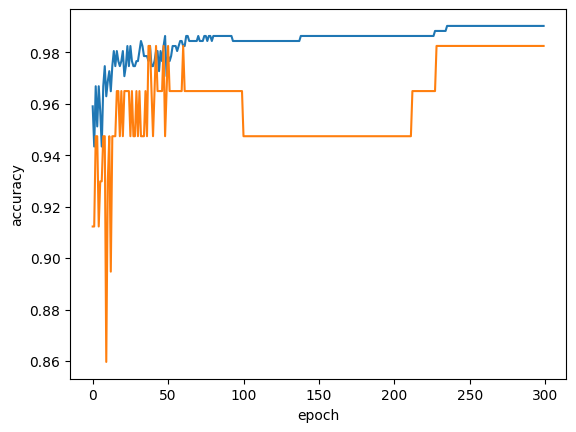

In [33]:


plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

**생각해보기**
5. 이 모델에서 몇 번째 에포크가 적절한 반복 횟수일까요? 그리고 그렇게 생각한 이유는 무엇인가요?

220이 적절한 반복 횟수인 것 같다. train set과 test set의 정확도가 높고, 두 점수 사이에 거리가 가장 가까운 구간이다.

In [34]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(X_train_scaled, y_train)

print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))

0.986328125
0.9824561403508771


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [35]:

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) #힌지 모델
sc.fit(X_train_scaled, y_train)

print(sc.score(X_train_scaled, y_train))
print(sc.score(X_test_scaled, y_test))


0.984375
0.9824561403508771
